## Problem Statement

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Import Data Set

#### Data Dictionary

    - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [2]:
bikes = pd.read_csv('../DataSet/day.csv')

In [3]:
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Visualise Data Set

In [6]:
bikes.corr()

instant        season            yr          mnth   holiday  \
instant     1.000000  4.135867e-01  8.660262e-01  4.982507e-01  0.016275   
season      0.413587  1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868   
yr          0.866026 -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195   
mnth        0.498251  8.310321e-01 -5.162656e-16  1.000000e+00  0.018905   
holiday     0.016275 -1.086804e-02  8.195345e-03  1.890483e-02  1.000000   
weekday    -0.000023 -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962   
workingday -0.004619  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948   
weathersit -0.021862  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395   
temp        0.150738  3.333607e-01  4.878919e-02  2.190833e-01 -0.028764   
atemp       0.152773  3.420139e-01  4.721519e-02  2.264302e-01 -0.032703   
hum         0.016080  2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662   
windspeed  -0.112667 -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257   
casual      0.275604  2.087373e-01  2.505017e-01  1.212079e-01  0.054055   
registered  0.660544  4.103102e-01  5.969106e-01  2.919516e-01 -0.109142   
cnt         0.629896  4.045838e-01  5.697285e-01  2.781909e-01 -0.068764   

             weekday  workingday  weathersit      temp     atemp       hum  \
instant    -0.000023   -0.004619   -0.021862  0.150738  0.152773  0.016080   
season     -0.003081    0.013762    0.021306  0.333361  0.342014  0.208220   
yr         -0.005466   -0.002945   -0.050322  0.048789  0.047215 -0.112547   
mnth        0.009523   -0.004688    0.045613  0.219083  0.226430  0.224937   
holiday    -0.101962   -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   
weekday     1.000000    0.035800    0.031112 -0.000168 -0.007539 -0.052290   
workingday  0.035800    1.000000    0.060236  0.053470  0.052940  0.023202   
weathersit  0.031112    0.060236    1.000000 -0.119503 -0.120559  0.590277   
temp       -0.000168    0.053470   -0.119503  1.000000  0.991696  0.128565   
atemp      -0.007539    0.052940   -0.120559  0.991696  1.000000  0.141512   
hum        -0.052290    0.023202    0.590277  0.128565  0.141512  1.000000   
windspeed   0.014283   -0.018666    0.039769 -0.158186 -0.183876 -0.248506   
casual      0.059978   -0.517607   -0.246044  0.542731  0.543362 -0.075211   
registered  0.057427    0.305437   -0.259025  0.539436  0.543678 -0.089212   
cnt         0.067534    0.062542   -0.295929  0.627044  0.630685 -0.098543   

            windspeed    casual  registered       cnt  
instant     -0.112667  0.275604    0.660544  0.629896  
season      -0.229607  0.208737    0.410310  0.404584  
yr          -0.011624  0.250502    0.596911  0.569728  
mnth        -0.208013  0.121208    0.291952  0.278191  
holiday      0.006257  0.054055   -0.109142 -0.068764  
weekday      0.014283  0.059978    0.057427  0.067534  
workingday  -0.018666 -0.517607    0.305437  0.062542  
weathersit   0.039769 -0.246044   -0.259025 -0.295929  
temp        -0.158186  0.542731    0.539436  0.627044  
atemp       -0.183876  0.543362    0.543678  0.630685  
hum         -0.248506 -0.075211   -0.089212 -0.098543  
windspeed    1.000000 -0.167995   -0.217914 -0.235132  
casual      -0.167995  1.000000    0.394137  0.672123  
registered  -0.217914  0.394137    1.000000  0.945411  
cnt         -0.235132  0.672123    0.945411  1.000000

<Figure size 2592x2016 with 0 Axes>

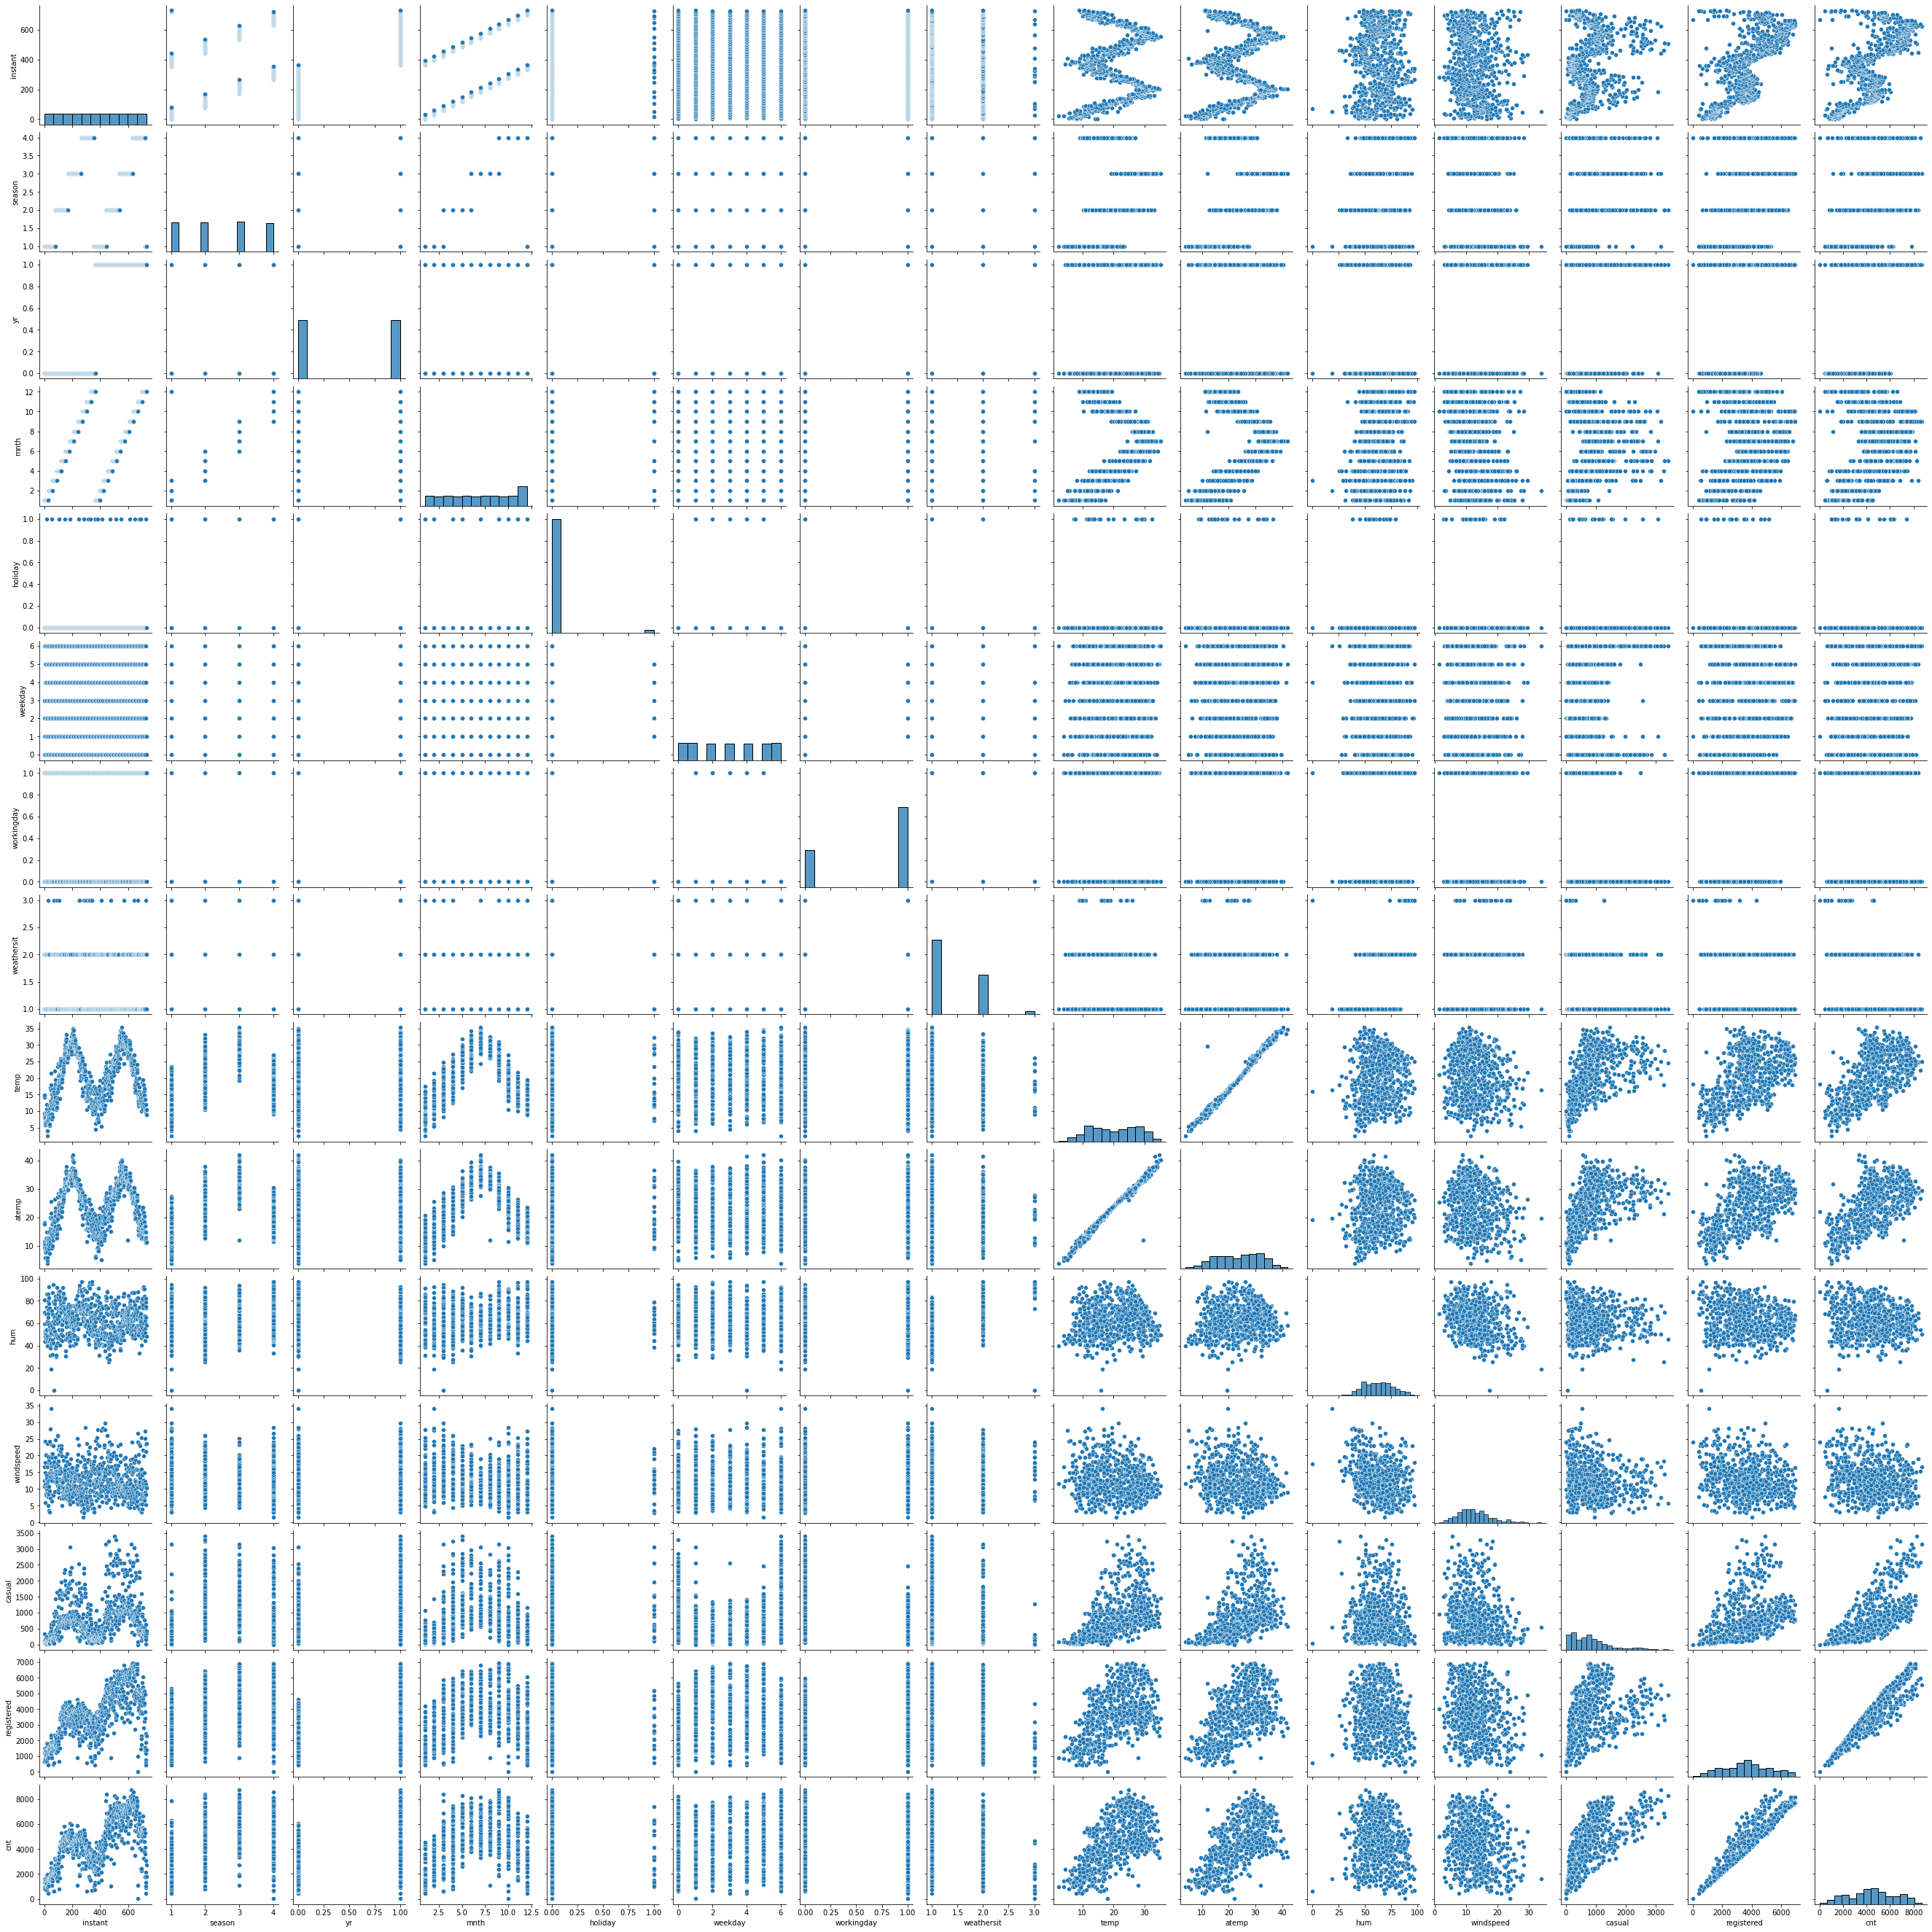

In [7]:
plt.figure(figsize=(36,28))
sns.pairplot(bikes)
plt.show()

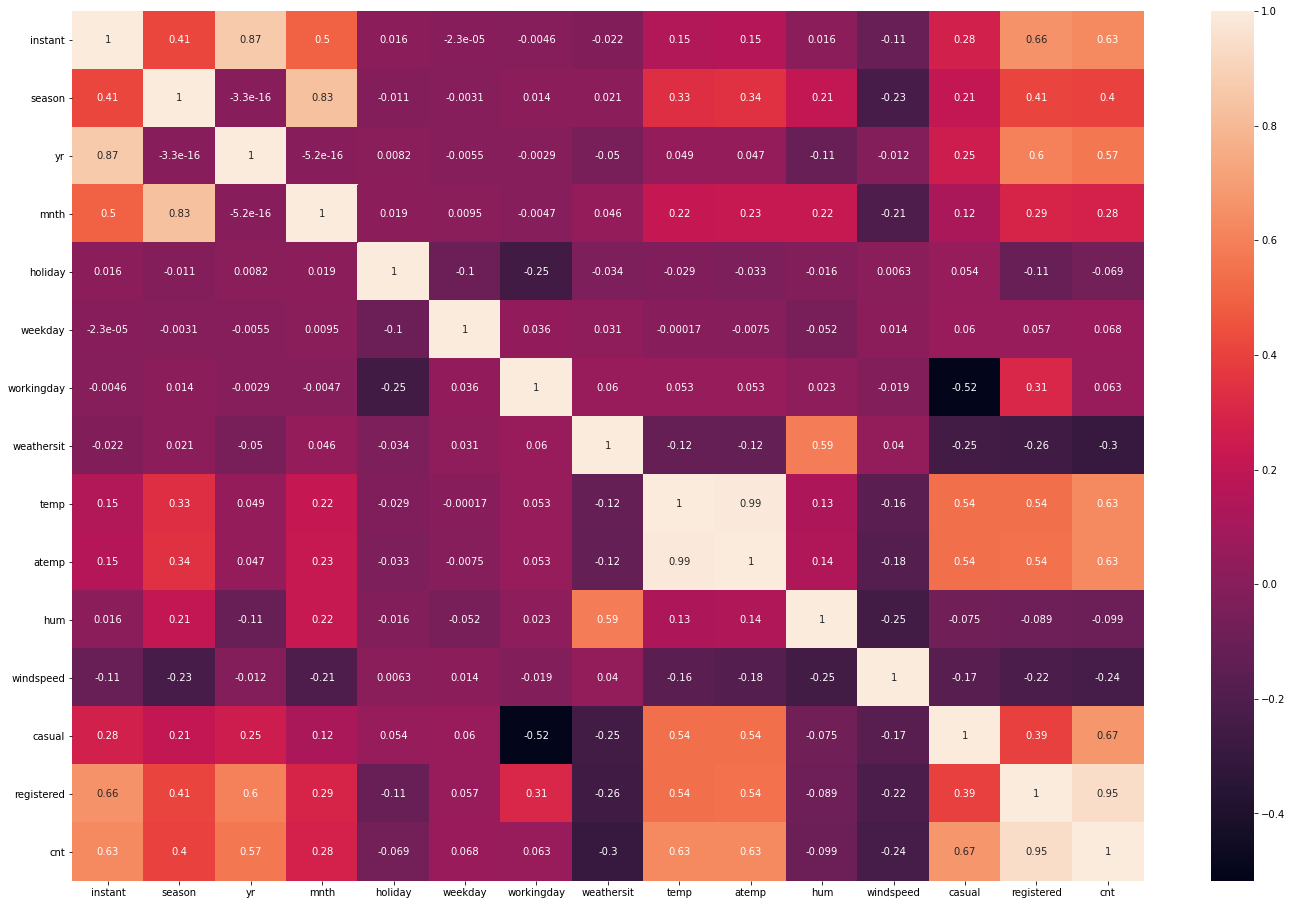

In [8]:
plt.figure(figsize=(24,16))
sns.heatmap(bikes.corr(), annot=True)
plt.show()

It can be noted from the scatter plot and heatmap that the columns <b>`temp`</b>, <b>`casual`</b>, and <b>`registered`</b> have the linear correlation. But this cannot be proved as a causation that count of bikes rented on any given day has a strong relationship with these column at this point.

Plotting a box plot to see the realtionship betweeen count and categorical data.

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- holiday : whether day is a holiday or not
+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

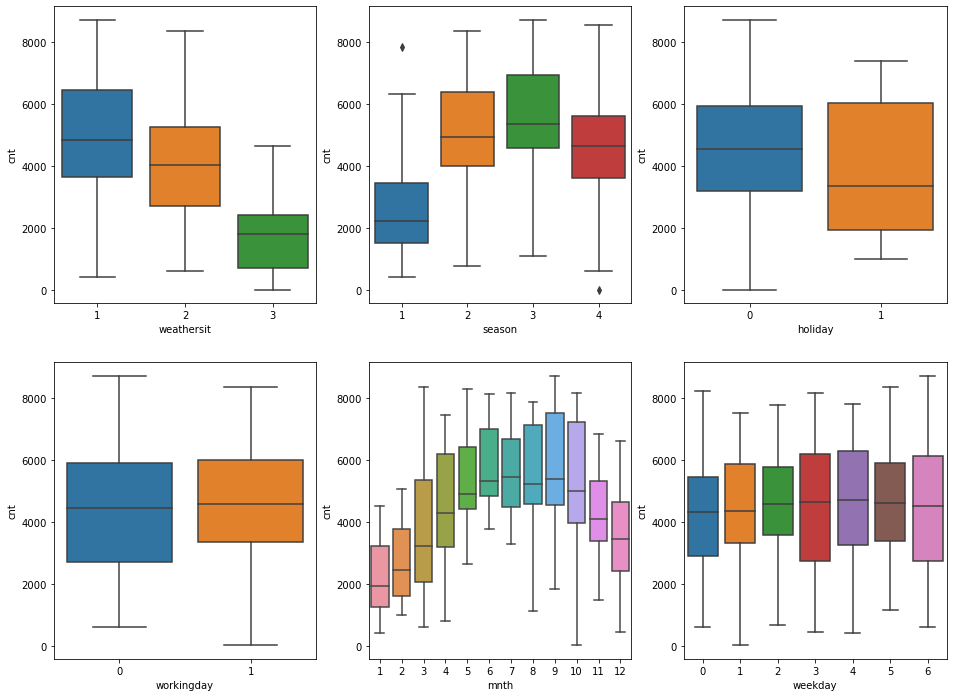

In [9]:
plt.figure(figsize=(16,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.show()

In [60]:
bikes[bikes['holiday']==1].head()

holiday  workingday       temp     atemp      hum  windspeed   cnt  \
16         1           0   7.209153   8.83855  53.7500  12.999139  1000   
51         1           0  12.436653  14.20375  60.5000  20.625682  1107   
104        1           0  18.313347  22.09565  67.1250  15.167125  3126   
149        1           0  30.066653  33.55460  68.5000   8.792075  4098   
184        1           0  29.793347  33.27085  63.7917   5.459106  6043   

     spring  summer  winter  ...  november  october  september  monday  \
16        1       0       0  ...         0        0          0       0   
51        1       0       0  ...         0        0          0       0   
104       0       1       0  ...         0        0          0       0   
149       0       1       0  ...         0        0          0       0   
184       0       0       0  ...         0        0          0       0   

     saturday  sunday  thursday  tuesday  wednesday  2019  
16          0       0         0        0          1     0  
51          0       0         0        0          1     0  
104         0       1         0        0          0     0  
149         0       0         0        0          1     0  
184         0       0         0        0          1     0  

[5 rows x 30 columns]

### Data Pre-Processing

Removing <b>`instant`</b> column as it has no significance with the data set.
Removing the column <b>`dteday`</b> as it has been bifurcated by the variables <b>`mnth`</b> and <b>`yr`</b>.
Removing the columns <b>`casual`</b> and <b>`registered`</b> as they are not features.

In [10]:
bikes.drop(['instant', 'dteday','casual','registered'],axis=1, inplace=True)

Mapping the values of season to their actual value. 
 - season : season (1:spring, 2:summer, 3:fall, 4:winter)

In [11]:
def season(x):
    if x == 1:
        return "spring"
    elif x == 2:
        return "summer"
    elif x == 3:
        return "fall"
    elif x == 4:
        return "winter"
bikes['season'] = bikes['season'].apply(season)

In [12]:
def weather(x):
    if x == 1:
        return "clear"
    elif x == 2:
        return "misty_cloudy"
    elif x == 3:
        return "light_rain_snow"
    elif x == 4:
        return "heavy_rain"
bikes['weathersit'] = bikes['weathersit'].apply(weather)

In [13]:
def month(x):
    if x == 1:
        return "january"
    elif x == 2:
        return "february"
    elif x == 3:
        return "march"
    elif x == 4:
        return "april"
    elif x == 5:
        return "may"
    elif x == 6:
        return "june"   
    elif x == 7:
        return "july"
    elif x == 8:
        return "august"
    elif x == 9:
        return "september"
    elif x == 10:
        return "october"
    elif x == 11:
        return "november"  
    elif x == 12:
        return "december"      
bikes['mnth'] = bikes['mnth'].apply(month)

In [14]:
def weekday(x):
    if x == 0:
        return "tuesday"
    elif x == 1:
        return "wednesday"
    elif x == 2:
        return "thursday"
    elif x == 3:
        return "friday"
    elif x == 4:
        return "saturday"
    elif x == 5:
        return "sunday"
    elif x == 6:
        return "monday"   
bikes['weekday'] = bikes['weekday'].apply(weekday)

In [15]:
def year(x):
    if x == 0:
        return "2018"
    else:
        return "2019"   
bikes['yr'] = bikes['yr'].apply(year)

### Dummy Variables

We can drop the `fall` column as the seasons can be identified with 3 columns
- `000` corresponds to `fall`
- `100` corresponds to `spring`
- `010` corresponds to `summer`
- `001` corresponds to `winter`

In [16]:
season_dummy = pd.get_dummies(bikes['season'],drop_first=True, dtype='int64')
bikes = pd.concat([bikes, season_dummy], axis = 1)
bikes.drop(['season'], axis=1, inplace=True)

#### Note: The data set does not contain data for `weathersit` column equal to 4 (i.e. no record of bikes given for rent by BoomBike when the weather had Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog )

We can drop the `light_rain_snow` column as the weather can be identified with 2 columns
- `00` corresponds to `light_rain_snow`
- `10` corresponds to `misty_cloudy`
- `01` corresponds to `partly_cloudy`

In [17]:
weather_dummy = pd.get_dummies(bikes['weathersit'], drop_first=True, dtype='int64')
bikes = pd.concat([bikes, weather_dummy], axis = 1)
bikes.drop(['weathersit'], axis=1, inplace=True)

Creating dummy variables for months where we will keep 11 out of 12 levels of the variable <b>`mnth`</b>. So we'll drop the first level that is <b>April</b>.

- `00010000000` corresponds to the month `january`
- `00100000000` corresponds to the month `february`
- `00000010000` corresponds to the month `march`
- `00000000000` corresponds to the month `april`
- `00000001000` corresponds to the month `may`
- `00000100000` corresponds to the month `june`
- `00001000000` corresponds to the month `july`
- `10000000000` corresponds to the month `august`
- `00000000001` corresponds to the month `september`
- `00000000010` corresponds to the month `october`
- `00000000100` corresponds to the month `november`
- `01000000000` corresponds to the month `december`

In [18]:
month_dummy = pd.get_dummies(bikes['mnth'], drop_first=True, dtype='int64')
bikes = pd.concat([bikes, month_dummy], axis = 1)
bikes.drop(['mnth'], axis=1, inplace=True)

Creating dummy variables for weekday where we will keep 6 out of 7 levels of the variable <b>`weekday`</b>. So we'll drop the first level that is <b>friday</b>.

- `001000` corresponds to the weekday `sunday`
- `100000` corresponds to the weekday `monday`
- `000010` corresponds to the weekday `tuesday`
- `000001` corresponds to the weekday `wednesday`
- `000100` corresponds to the weekday `thursday`
- `000000` corresponds to the weekday `friday`
- `010000` corresponds to the weekday `saturday`

In [19]:
weekday_dummy = pd.get_dummies(bikes['weekday'], drop_first=True, dtype='int64')
bikes = pd.concat([bikes, weekday_dummy], axis = 1)
bikes.drop(['weekday'], axis=1, inplace=True)

In [20]:
year_dummy = pd.get_dummies(bikes['yr'], drop_first=True, dtype='int64')
bikes = pd.concat([bikes, year_dummy], axis = 1)
bikes.drop(['yr'], axis=1, inplace=True)

In [21]:
bikes.head()

holiday  workingday       temp     atemp      hum  windspeed   cnt  spring  \
0        0           0  14.110847  18.18125  80.5833  10.749882   985       1   
1        0           0  14.902598  17.68695  69.6087  16.652113   801       1   
2        0           1   8.050924   9.47025  43.7273  16.636703  1349       1   
3        0           1   8.200000  10.60610  59.0435  10.739832  1562       1   
4        0           1   9.305237  11.46350  43.6957  12.522300  1600       1   

   summer  winter  ...  november  october  september  monday  saturday  \
0       0       0  ...         0        0          0       1         0   
1       0       0  ...         0        0          0       0         0   
2       0       0  ...         0        0          0       0         0   
3       0       0  ...         0        0          0       0         0   
4       0       0  ...         0        0          0       0         0   

   sunday  thursday  tuesday  wednesday  2019  
0       0         0        0          0     0  
1       0         0        1          0     0  
2       0         0        0          1     0  
3       0         1        0          0     0  
4       0         0        0          0     0  

[5 rows x 30 columns]

In [22]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   holiday          730 non-null    int64  
 1   workingday       730 non-null    int64  
 2   temp             730 non-null    float64
 3   atemp            730 non-null    float64
 4   hum              730 non-null    float64
 5   windspeed        730 non-null    float64
 6   cnt              730 non-null    int64  
 7   spring           730 non-null    int64  
 8   summer           730 non-null    int64  
 9   winter           730 non-null    int64  
 10  light_rain_snow  730 non-null    int64  
 11  misty_cloudy     730 non-null    int64  
 12  august           730 non-null    int64  
 13  december         730 non-null    int64  
 14  february         730 non-null    int64  
 15  january          730 non-null    int64  
 16  july             730 non-null    int64  
 17  june            

### Train-Test Data Split

In [23]:
np.random.seed(0)
df_train, df_test = train_test_split(bikes,train_size=0.8,test_size=0.2,random_state = 100)
print(df_train.shape)
print(df_test.shape)

(584, 30)
(146, 30)


### Rescale Data

In [24]:
scaler = MinMaxScaler()

In [25]:
cols_to_scale = ['temp','atemp','hum','windspeed','cnt']
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

In [26]:
df_train.head()

holiday  workingday      temp     atemp       hum  windspeed       cnt  \
367        0           1  0.113228  0.061963  0.454701   0.695175  0.254717   
648        0           1  0.468352  0.462175  0.477458   0.299450  0.868385   
44         0           1  0.443431  0.419099  0.387290   0.807474  0.217556   
705        0           1  0.326094  0.318824  0.787463   0.189819  0.573631   
379        0           0  0.133996  0.108365  0.431945   0.449210  0.263346   

     spring  summer  winter  ...  november  october  september  monday  \
367       1       0       0  ...         0        0          0       0   
648       0       0       1  ...         0        1          0       0   
44        1       0       0  ...         0        0          0       0   
705       0       0       1  ...         0        0          0       0   
379       1       0       0  ...         0        0          0       0   

     saturday  sunday  thursday  tuesday  wednesday  2019  
367         0       0         1        0          0     1  
648         1       0         0        0          0     1  
44          0       0         0        0          1     0  
705         0       1         0        0          0     1  
379         0       0         0        1          0     1  

[5 rows x 30 columns]

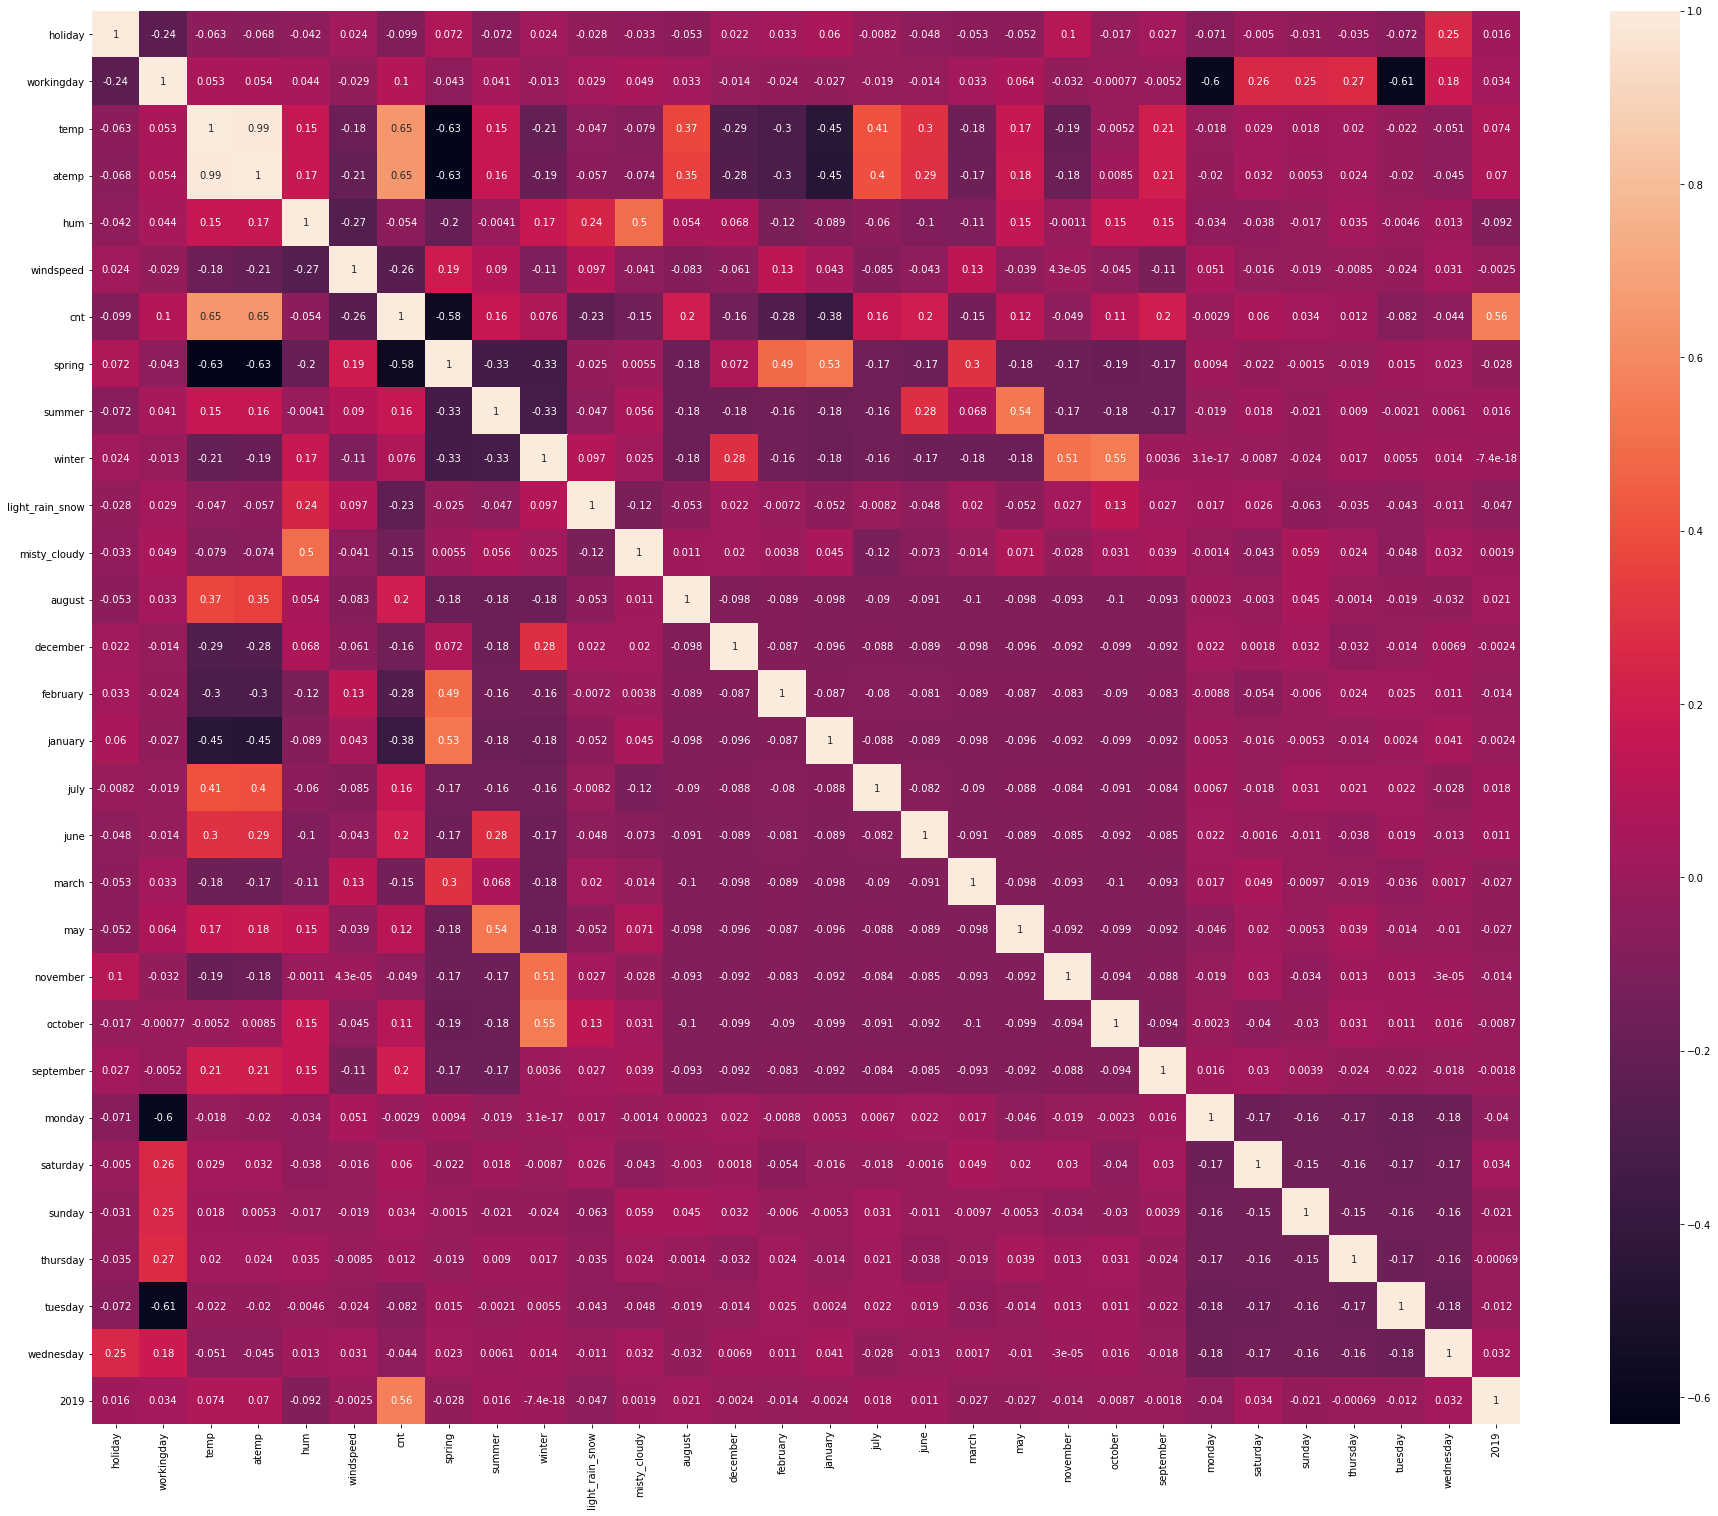

In [27]:
plt.figure(figsize=(32,26))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

### Split Train data in X - independant features and y - dependant features

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Feature Selection

In [29]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [30]:
rfe = RFE(lrm,15)
rfe = rfe.fit(X_train,y_train)
sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train.columns, rfe.support_))

[(1, '2019', True),
 (1, 'december', True),
 (1, 'holiday', True),
 (1, 'hum', True),
 (1, 'january', True),
 (1, 'july', True),
 (1, 'light_rain_snow', True),
 (1, 'misty_cloudy', True),
 (1, 'monday', True),
 (1, 'november', True),
 (1, 'spring', True),
 (1, 'temp', True),
 (1, 'windspeed', True),
 (1, 'winter', True),
 (1, 'workingday', True),
 (2, 'september', False),
 (3, 'summer', False),
 (4, 'february', False),
 (5, 'atemp', False),
 (6, 'tuesday', False),
 (7, 'wednesday', False),
 (8, 'thursday', False),
 (9, 'may', False),
 (10, 'august', False),
 (11, 'october', False),
 (12, 'june', False),
 (13, 'sunday', False),
 (14, 'march', False),
 (15, 'saturday', False)]

In [31]:
auto_cols = X_train.columns[rfe.support_]

#### Automated feature selected using RFE

In [32]:
X_train_rfe = X_train[auto_cols]

### Build MLR Model

#### First MLR Model

In [33]:
## First model
X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.02e-223
Time:                        22:42:24   Log-Likelihood:                 598.33
No. Observations:                 584   AIC:                            -1165.
Df Residuals:                     568   BIC:                            -1095.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3155      0.031     10.212      0.000       0.255       0.376
holiday            -0.0436      0.024     -1.806      0.071      -0.091       0.004
workingday          0.0510      0.010      4.920      0.000       0.031       0.071
temp                0.4458      0.031     14.594      0.000       0.386       0.506
hum                -0.1295      0.035     -3.671      0.000      -0.199      -0.060
windspeed          -0.1838      0.024     -7.763      0.000      -0.230      -0.137
spring             -0.1105      0.014     -7.800      0.000      -0.138      -0.083
winter              0.0817      0.012      6.557      0.000       0.057       0.106
light_rain_snow    -0.2634      0.025    -10.534      0.000      -0.313      -0.214
misty_cloudy       -0.0597      0.010     -6.135      0.000      -0.079      -0.041
december           -0.0604      0.015     -3.937      0.000      -0.091      -0.030
january            -0.0500      0.016     -3.056      0.002      -0.082      -0.018
july               -0.0787      0.016     -5.030      0.000      -0.109      -0.048
november           -0.0688      0.017     -4.041      0.000      -0.102      -0.035
monday              0.0613      0.013      4.618      0.000       0.035       0.087
2019                0.2289      0.007     30.876      0.000       0.214       0.243
==============================================================================
Omnibus:                       96.561   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.184
Skew:                          -0.797   Prob(JB):                     3.22e-62
Kurtosis:                       6.017   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Using `VIF` to identify `multicollinearity`

In [34]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0             const  71.88
3              temp   3.56
6            spring   2.85
7            winter   2.19
4               hum   1.95
2        workingday   1.79
14           monday   1.70
13         november   1.62
9      misty_cloudy   1.61
11          january   1.60
10         december   1.41
12             july   1.28
8   light_rain_snow   1.25
5         windspeed   1.19
1           holiday   1.17
15             2019   1.03

#### Second MLR Model

In [35]:
## Second model
X_train_rfe.drop(['holiday'], axis=1, inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe)
lm = lr.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     230.9
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          6.59e-224
Time:                        22:42:24   Log-Likelihood:                 596.66
No. Observations:                 584   AIC:                            -1163.
Df Residuals:                     569   BIC:                            -1098.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3110      0.031     10.079      0.000       0.250       0.372
workingday          0.0574      0.010      5.889      0.000       0.038       0.077
temp                0.4430      0.031     14.493      0.000       0.383       0.503
hum                -0.1283      0.035     -3.629      0.000      -0.198      -0.059
windspeed          -0.1847      0.024     -7.787      0.000      -0.231      -0.138
spring             -0.1120      0.014     -7.898      0.000      -0.140      -0.084
winter              0.0817      0.012      6.548      0.000       0.057       0.106
light_rain_snow    -0.2634      0.025    -10.513      0.000      -0.313      -0.214
misty_cloudy       -0.0598      0.010     -6.132      0.000      -0.079      -0.041
december           -0.0620      0.015     -4.037      0.000      -0.092      -0.032
january            -0.0513      0.016     -3.139      0.002      -0.083      -0.019
july               -0.0783      0.016     -4.996      0.000      -0.109      -0.048
november           -0.0722      0.017     -4.254      0.000      -0.106      -0.039
monday              0.0678      0.013      5.290      0.000       0.043       0.093
2019                0.2287      0.007     30.792      0.000       0.214       0.243
==============================================================================
Omnibus:                      100.725   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.825
Skew:                          -0.823   Prob(JB):                     2.88e-66
Kurtosis:                       6.113   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0             const  71.40
2              temp   3.55
5            spring   2.84
6            winter   2.19
3               hum   1.94
8      misty_cloudy   1.61
10          january   1.60
12         november   1.60
1        workingday   1.58
13           monday   1.57
9          december   1.41
11             july   1.28
7   light_rain_snow   1.25
4         windspeed   1.19
14             2019   1.03

### The final model has a `R2` value of `0.85` where the model explains `85%` of the data set and an `Adjusted-R2` of `84.7%`.

### Residual Analysis

In [37]:
y_train_pred = lm.predict(X_train_rfe)

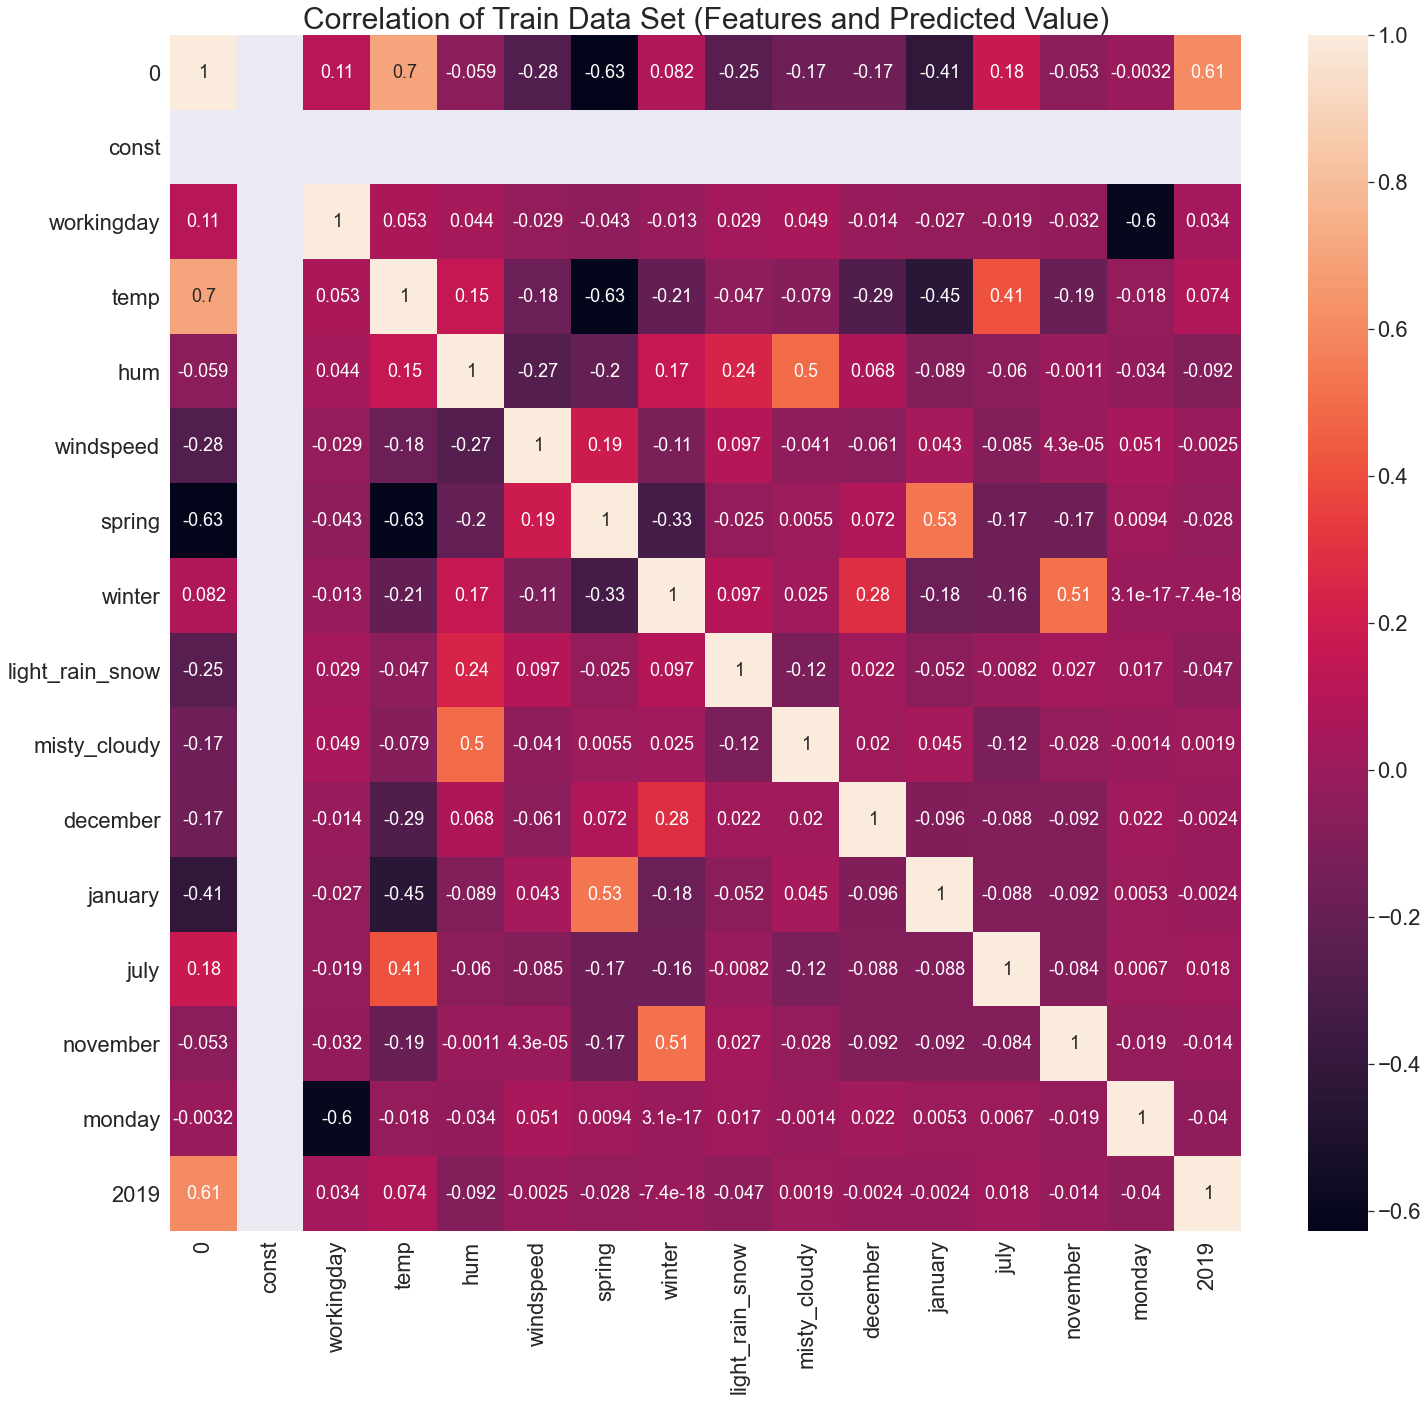

In [38]:
plt.figure(figsize=(24,22))
sns.set(font_scale=2)
sns.heatmap(pd.concat([y_train_pred,X_train_rfe], axis=1).corr(), annot=True, annot_kws={'fontsize': 18})
plt.title("Correlation of Train Data Set (Features and Predicted Value)", fontsize=30)
plt.show()

In [39]:
error_terms = y_train - y_train_pred

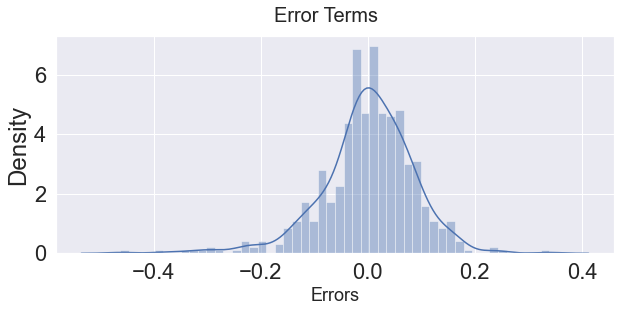

In [40]:
fig = plt.figure(figsize=(10,4))
sns.distplot(error_terms, bins=50)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

#### The error terms are centered around zero. Hence this assumption of Linear Regression holds true

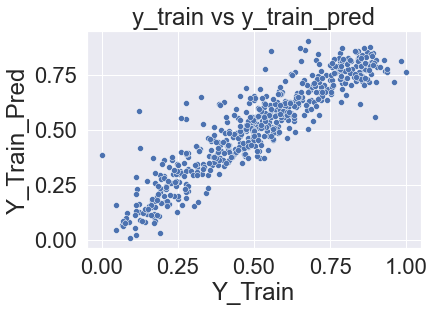

In [41]:
sns.scatterplot(x=y_train, y=y_train_pred)
plt.title("y_train vs y_train_pred")
plt.xlabel('Y_Train')
plt.ylabel('Y_Train_Pred')
plt.show()

#### Looking for patterns between `error terms` and `X_train` values

In [42]:
X_train_rfe.columns

Index(['const', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'light_rain_snow', 'misty_cloudy', 'december', 'january', 'july',
       'november', 'monday', '2019'],
      dtype='object')

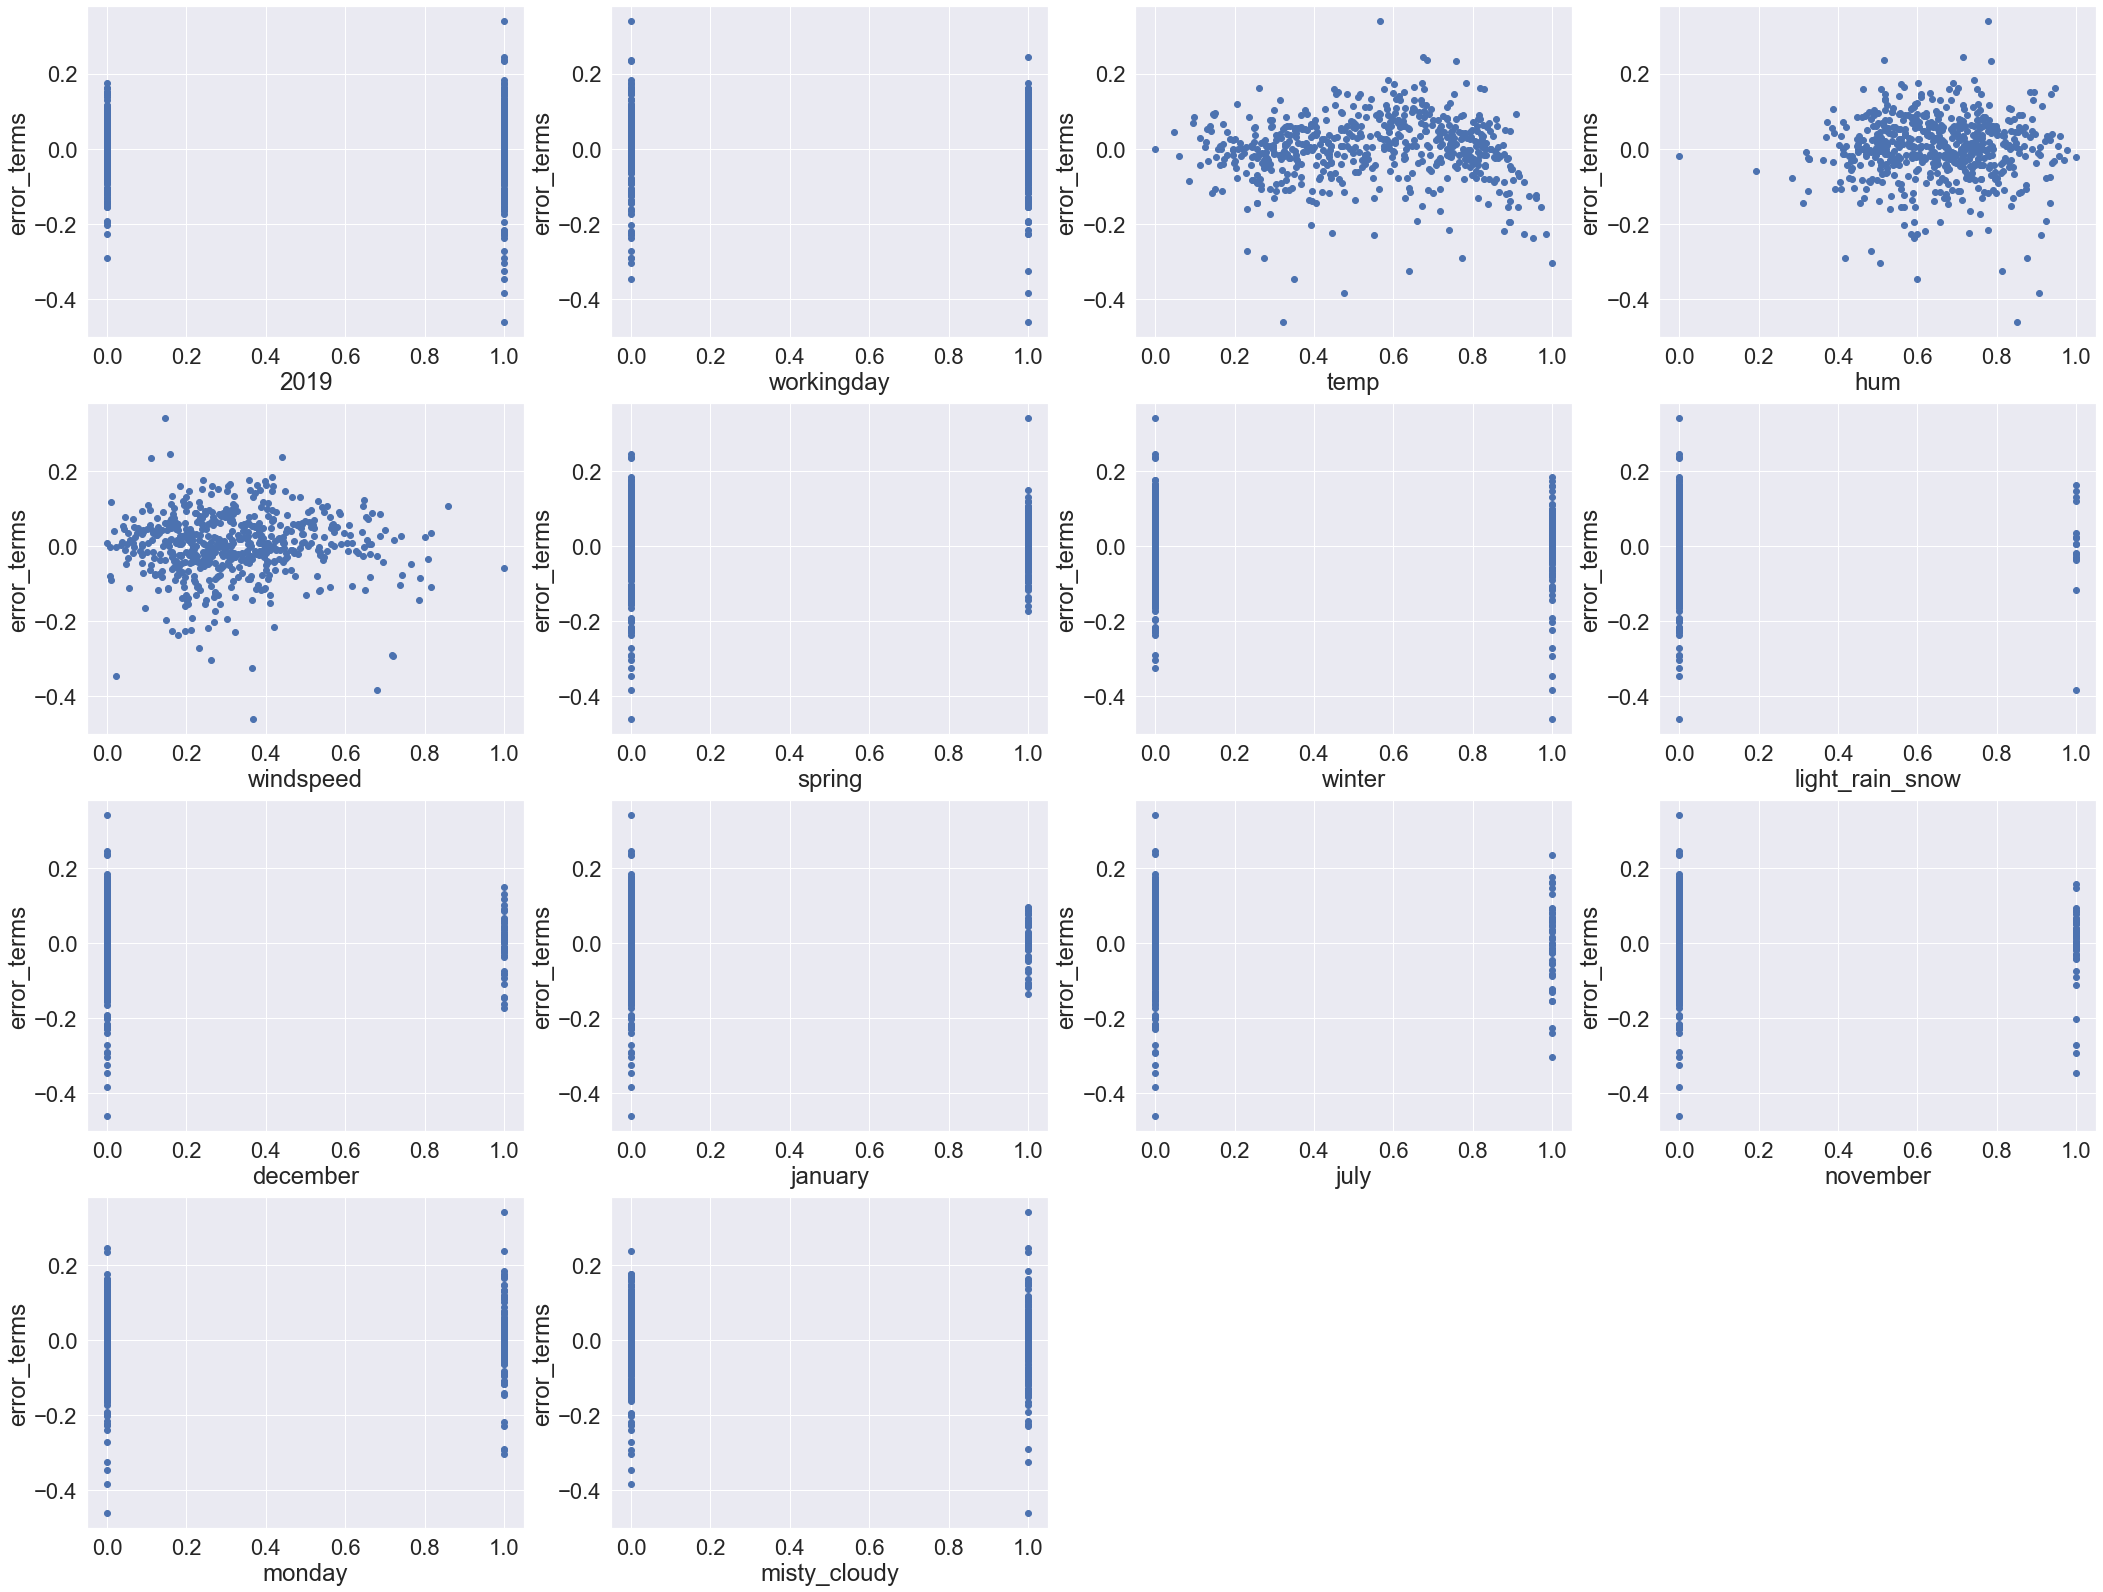

In [43]:
plt.figure(figsize=(36,28))
plt.subplot(4,4,1)
plt.scatter(x=X_train_rfe['2019'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("2019")
plt.subplot(4,4,2)
plt.scatter(x=X_train_rfe['workingday'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("workingday")
plt.subplot(4,4,3)
plt.scatter(x=X_train_rfe['temp'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("temp")
plt.subplot(4,4,4)
plt.scatter(x=X_train_rfe['hum'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("hum")
plt.subplot(4,4,5)
plt.scatter(x=X_train_rfe['windspeed'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("windspeed")
plt.subplot(4,4,6)
plt.scatter(x=X_train_rfe['spring'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("spring")
plt.subplot(4,4,7)
plt.scatter(x=X_train_rfe['winter'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("winter")
plt.subplot(4,4,8)
plt.scatter(x=X_train_rfe['light_rain_snow'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("light_rain_snow")
plt.subplot(4,4,9)
plt.scatter(x=X_train_rfe['december'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("december")
plt.subplot(4,4,10)
plt.scatter(x=X_train_rfe['january'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("january")
plt.subplot(4,4,11)
plt.scatter(x=X_train_rfe['july'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("july")
plt.subplot(4,4,12)
plt.scatter(x=X_train_rfe['november'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("november")
plt.subplot(4,4,13)
plt.scatter(x=X_train_rfe['monday'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("monday")
plt.subplot(4,4,14)
plt.scatter(x=X_train_rfe['misty_cloudy'],y=error_terms)
plt.ylabel("error_terms")
plt.xlabel("misty_cloudy")
plt.show()

#### The data points are centered around `zero` for the `error term` vs `X_train`

In [44]:
residual_sum_square = sum(error_terms.apply(lambda x: x**2))
round(residual_sum_square,2)

4.43

#### The RSS value is low at `4.43`

In [45]:
residual_sum_error = np.sqrt(residual_sum_square/(error_terms.shape[0]-2))*100
round(residual_sum_error, 2)

8.73

#### The RSE value is low at `8.73%`

### Predict values on test data set

#### Rescaling test data set

In [46]:
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])
df_test.head()

holiday  workingday      temp     atemp       hum  windspeed       cnt  \
184        1           0  0.831783  0.769660  0.657364   0.084219  0.692706   
535        0           1  0.901354  0.842587  0.610133   0.153728  0.712034   
299        0           1  0.511964  0.496145  0.837699   0.334206  0.303382   
221        0           1  0.881625  0.795343  0.437098   0.339570  0.547400   
152        0           1  0.817246  0.741471  0.314298   0.537414  0.569029   

     spring  summer  winter  ...  november  october  september  monday  \
184       0       0       0  ...         0        0          0       0   
535       0       1       0  ...         0        0          0       0   
299       0       0       1  ...         0        1          0       0   
221       0       0       0  ...         0        0          0       0   
152       0       1       0  ...         0        0          0       0   

     saturday  sunday  thursday  tuesday  wednesday  2019  
184         0       0         0        0          1     0  
535         0       0         0        0          0     1  
299         1       0         0        0          0     0  
221         0       0         0        0          0     0  
152         1       0         0        0          0     0  

[5 rows x 30 columns]

#### Splitting Data in X indepedent variables and Y dependent variable

In [47]:
y_test = df_test.pop('cnt')
X_test = df_test

In [48]:
X_test = sm.add_constant(X_test)

In [49]:
X_test_sltFeat = X_test[X_train_rfe.columns]

#### Make prediction on the test data

In [50]:
y_test_pred = lm.predict(X_test_sltFeat)

#### The `R2` score on the test data set is `0.790`. This means that the linear regression model explains `79%` of the test (unseen) data.

In [51]:
r2_score(y_test, y_test_pred)

0.7840827509029041

#### Calculate error terms on the test data set.

In [52]:
test_error_terms = y_test - y_test_pred

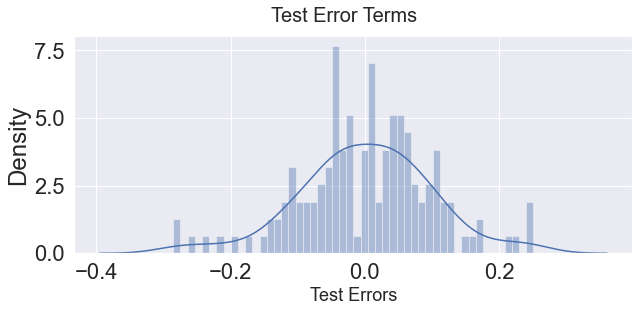

In [53]:
fig = plt.figure(figsize=(10,4))
sns.distplot(test_error_terms, bins=50)
fig.suptitle('Test Error Terms', fontsize = 20)
plt.xlabel('Test Errors', fontsize = 18) 
plt.show()

#### The error terms are centered around zero. Hence this assumption of Linear Regression on Test Data holds true

In [54]:
residual_sum_square_test = sum(test_error_terms.apply(lambda x: x**2))
round(residual_sum_square_test,2)

1.42

#### The RSS value is low at `1.42`. This is lower than the training data, so the model is accurate.

In [55]:
residual_sum_error_test = np.sqrt(residual_sum_square_test/(test_error_terms.shape[0]-2))*100
round(residual_sum_error_test, 2)

9.92

#### The RSE value is low at `9.92%` but marginally higher than the training data which can be considered negligible.

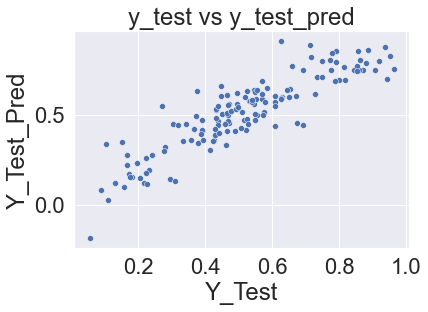

In [56]:
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title("y_test vs y_test_pred")
plt.xlabel('Y_Test')
plt.ylabel('Y_Test_Pred')
plt.show()

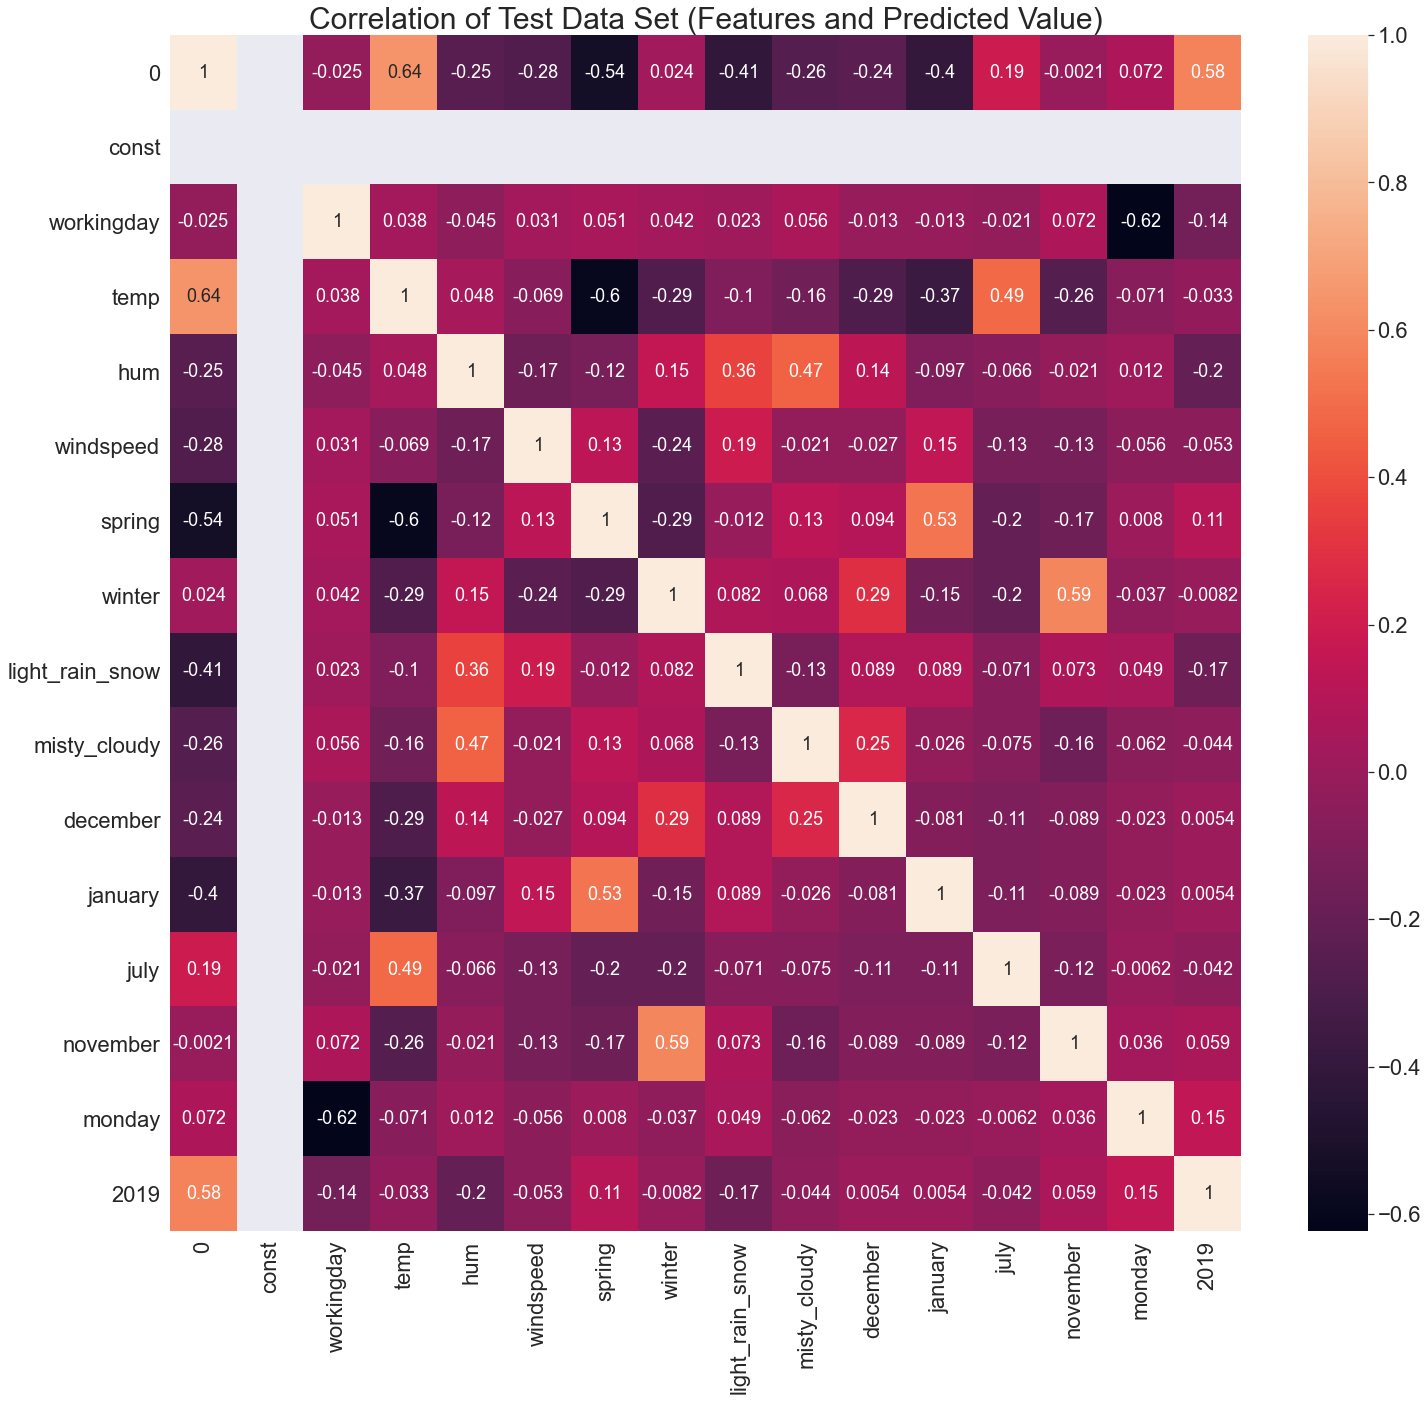

In [57]:
plt.figure(figsize=(24,22))
sns.set(font_scale=2)
sns.heatmap(pd.concat([y_test_pred,X_test_sltFeat], axis=1).corr(), annot=True, annot_kws={'fontsize': 18})
plt.title("Correlation of Test Data Set (Features and Predicted Value)", fontsize=30)
plt.show()